# Importing Libs

In [1]:
import pandas as pd
import numpy as np
# To Split Dataset
from sklearn.model_selection import train_test_split
# To convert data into numerical value to make it more meaningful
from sklearn.feature_extraction.text import TfidfVectorizer 
# Machine Learning Model
from sklearn.linear_model import LogisticRegression
# To test accuracy of the trained model
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Loading the Dataset (mail_data.csv)

In [2]:
data = pd.read_csv('mail_data.csv')

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data.shape

(5572, 2)

In [7]:
# To check for the Null values
data.isnull().values.any()

False

# Data Preprocessing

##### Label Encoding
##### Spam = 1
##### Ham   = 0

In [8]:
data['Category'] = data['Category'].map(lambda x : 1 if(x == 'spam') else 0)

In [9]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


##### Feature and Label

In [10]:
X = data['Message']
Y = data['Category']

# Train Test Split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3) 
# random state 3 will train data in the same manner

In [12]:
X_train.shape , X_test.shape

((4457,), (1115,))

In [13]:
Y_train.shape , Y_test.shape

((4457,), (1115,))

# Feature Extraction

In [14]:
# Transfroming text data to feature vectors
# minimum document frequency >= 1 i.e min_df = 1
feature_ext = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase='True' )

# Converting X_train and X_test into features
X_train_features = feature_ext.fit_transform(X_train) 
# Converting X_test into features
X_test_features = feature_ext.transform(X_test) # Note: not fit transform (using only for testing purpose) 


In [15]:
# Converting Y_train and Y_test as integar
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [16]:
#print(X_train_features)

# Training ML Models 

### Naive Bayes

In [17]:
summary = {'Model':[], 'Accuracy':[], 'precision':[], 'recall':[], 'fscore':[], 'support':[]}

# Build a Gaussian Classifier
NBmodel = GaussianNB()

# Model training
NBmodel.fit(X_train_features.toarray(), Y_train)

# Evaluation
prediction = NBmodel.predict(X_test_features.toarray())
accuracy   =  accuracy_score(Y_test, prediction)

precision, recall, fscore, support = score(Y_test,prediction)

summary['Model'].append('Naive Bayes')

summary['Accuracy'].append(accuracy)
summary['recall'].append(recall)
summary['fscore'].append(fscore)
summary['support'].append(support)
summary['precision'].append(precision)

print(f'Accuracy of Naive Bayes Model : {accuracy}')

Accuracy of Naive Bayes Model : 0.8878923766816144


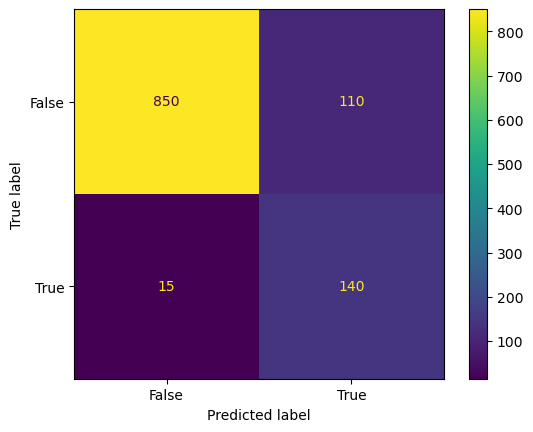

In [18]:
confusion_matrix = metrics.confusion_matrix(Y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Logistic Regression Model

In [19]:
# Build a LogisticRegression Classifier
LR_model = LogisticRegression()


LR_model.fit(X_train_features, Y_train)

# Evaluation
prediction =  LR_model.predict(X_test_features)
accuracy   =  accuracy_score(Y_test, prediction)
precision, recall, fscore, support = score(Y_test,prediction)

summary['Model'].append('Logistic Regression')
summary['Accuracy'].append(accuracy)
summary['recall'].append(recall)
summary['fscore'].append(fscore)
summary['support'].append(support)
summary['precision'].append(precision)


print(f'Accuracy of Logistic Redression Model : {accuracy}')

Accuracy of Logistic Redression Model : 0.9659192825112107


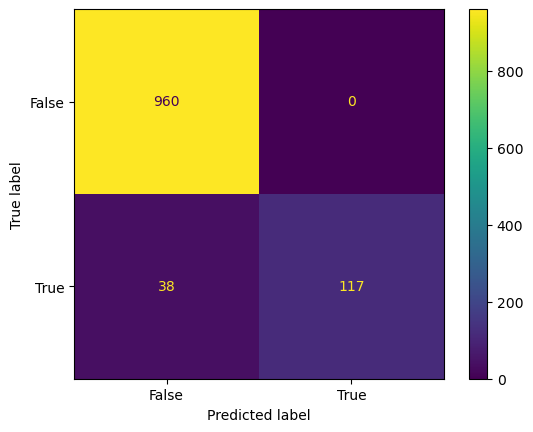

In [20]:
confusion_matrix = metrics.confusion_matrix(Y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## MultinomialNB Model

In [21]:
# Build a MultinomialNB Classifier
MNBmodel = MultinomialNB()

# Model training
MNBmodel.fit(X_train_features, Y_train)

# Evaluation
prediction = MNBmodel.predict(X_test_features)
accuracy   =  accuracy_score(Y_test, prediction)

precision, recall, fscore, support = score(Y_test,prediction)


summary['Model'].append('MultinomialNB')
summary['Accuracy'].append(accuracy)
summary['recall'].append(recall)
summary['fscore'].append(fscore)
summary['support'].append(support)
summary['precision'].append(precision)


print(f'Accuracy of MultinomialNB Model : {accuracy}')

Accuracy of MultinomialNB Model : 0.9730941704035875


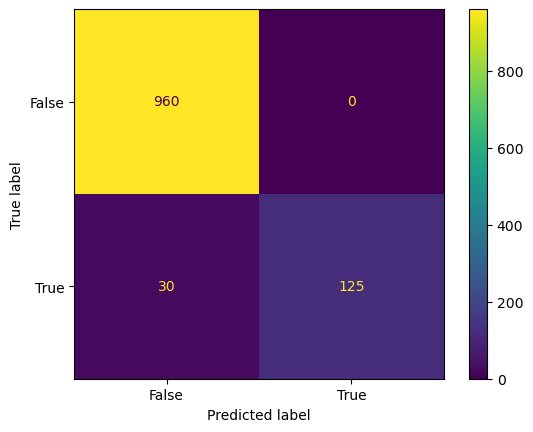

In [22]:
confusion_matrix = metrics.confusion_matrix(Y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Stack (Naive bayes + LogisticRegression + MultinomialNB Model)

In [23]:
MNBmodel = MultinomialNB()
LR_model = LogisticRegression()
NBmodel = GaussianNB()

classifiers = [('lr',LR_model),('mnb',MNBmodel),('nb',NBmodel),] #list of (str, estimator)

In [24]:
stack_model = StackingClassifier( estimators =  classifiers , final_estimator = SVC())

In [25]:
stack_model.fit(X_train_features.toarray(), Y_train)
prediction = stack_model.predict(X_test_features.toarray())

precision, recall, fscore, support = score(Y_test,prediction)
accuracy   =  accuracy_score(Y_test, prediction)

summary['Model'].append('Stack')
summary['Accuracy'].append(accuracy)
summary['recall'].append(recall)
summary['fscore'].append(fscore)
summary['support'].append(support)
summary['precision'].append(precision)



print(f'Accuracy of Stack Model : {accuracy}')

Accuracy of Stack Model : 0.989237668161435


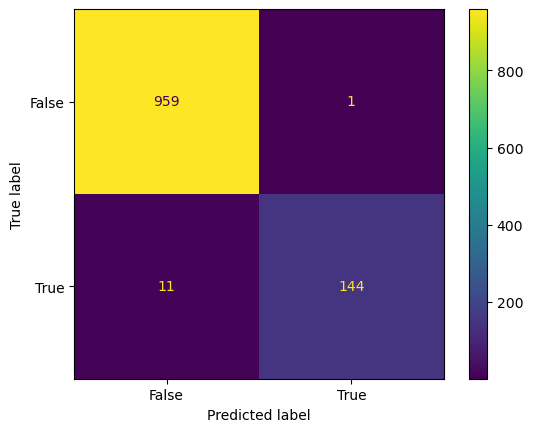

In [26]:
confusion_matrix = metrics.confusion_matrix(Y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Comparison

In [27]:
result = pd.DataFrame(summary) 

In [28]:
result

,Model,Accuracy,precision,recall,fscore,support
0,Naive Bayes,0.887892,"[0.9826589595375722, 0.56]","[0.8854166666666666, 0.9032258064516129]","[0.9315068493150684, 0.691358024691358]","[960, 155]"
1,Logistic Regression,0.965919,"[0.9619238476953907, 1.0]","[1.0, 0.7548387096774194]","[0.9805924412665985, 0.8602941176470589]","[960, 155]"
2,MultinomialNB,0.973094,"[0.9696969696969697, 1.0]","[1.0, 0.8064516129032258]","[0.9846153846153847, 0.8928571428571428]","[960, 155]"
3,Stack,0.989238,"[0.988659793814433, 0.993103448275862]","[0.9989583333333333, 0.9290322580645162]","[0.993782383419689, 0.9600000000000001]","[960, 155]"


##### Conclusion: Stack is giving better Accuracy